Set which dataset we want to analyze. The code has been built such that toggling the flag to the dataset 1 (alphabet) or 2 (greek letters) will work.

In [1]:
dataset = "1"

# Part 1: Plot the distribution of the number of the instances in each class.

Import required packages.

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import PredefinedSplit

Import information about the dataset.

In [3]:
f = open("./Assig1-Dataset/info_" + dataset + ".csv")
f.readline() # Skip header line
infoData = np.loadtxt(f, dtype={'names': ('index', 'label'), 'formats': ('i4', 'U1')  }, delimiter = ',')

print(infoData)

[( 0, 'A') ( 1, 'B') ( 2, 'C') ( 3, 'D') ( 4, 'E') ( 5, 'F') ( 6, 'G')
 ( 7, 'H') ( 8, 'I') ( 9, 'J') (10, 'K') (11, 'L') (12, 'M') (13, 'N')
 (14, 'O') (15, 'P') (16, 'Q') (17, 'R') (18, 'S') (19, 'T') (20, 'U')
 (21, 'V') (22, 'W') (23, 'X') (24, 'Y') (25, 'Z')]


Declare function to import and return data. Importdataset. 

The format of the dataset is a table with 1025 columns (1024 representing features, ie black & white image pixels, and the last column represents the label of the encoded image which corresponds to the above label-index pairing).

In [4]:
def importData(path):
    f = open(path)
    f.readline() #skip header line
    data = np.loadtxt(f, delimiter = ',', dtype="i4")
    print(data)
    return data

def importDataForGraphs(filePathData, filePathLetters):
    with open(filePathData, newline='') as file:
        reader = csv.reader(file)
        listOfInstances = [row[-1] for row in reader]
        dictOfLetters = switchTheIndexesIntoSymbols(filePathLetters)
        dictOfLetterAndOccurances = {dictOfLetters[i]:listOfInstances.count(i) for i in listOfInstances}
        return dictOfLetterAndOccurances

def switchTheIndexesIntoSymbols(filePath):
    with open(filePath, newline='') as file:
        reader = csv.reader(file)
        dictOfLetters = {}
        for row in reader:
            dictOfLetters[row[0]] = row[1]
        return dictOfLetters

Declare function to plot the histogram of data by plotting labels (last column of data).

In [5]:
def plot(dictOfLetterAndOccurances):
    yAxeList = dictOfLetterAndOccurances.values()
    xAxeList = dictOfLetterAndOccurances.keys()

    plt.bar(xAxeList, yAxeList)
    # x-axis label
    plt.xlabel('Classes')

    # y-axis label
    plt.ylabel('No. of instances')

    # Plot title
    plt.title('Number of instances in each class')

    # Show the plot
    plt.show()

Import training, validation and testing data for ploting the historgrams.

In [6]:
trainingData = importDataForGraphs("./Assig1-Dataset/train_" + dataset + ".csv", "./Assig1-Dataset/info_" + dataset + ".csv")
validationData = importDataForGraphs("./Assig1-Dataset/val_" + dataset + ".csv", "./Assig1-Dataset/info_" + dataset + ".csv")
testingData = importDataForGraphs("./Assig1-Dataset/test_with_label_" + dataset + ".csv", "./Assig1-Dataset/info_" + dataset + ".csv")

 Plot histogram of training data.

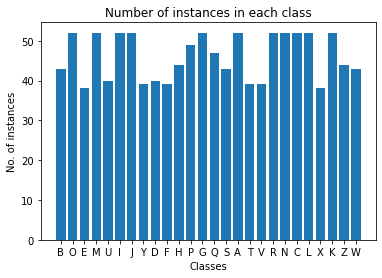

In [7]:
plot(trainingData)

 Plot histogram of validation data.

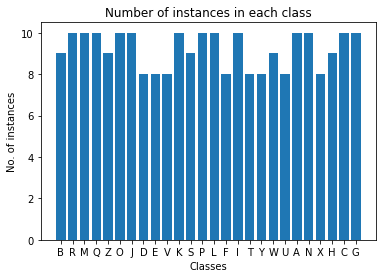

In [8]:
plot(validationData)

Plot histogram of testing data.

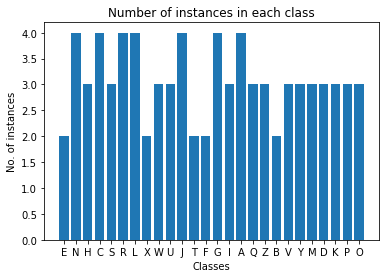

In [9]:
plot(testingData)

***

# Part 2: Run 6 ML models

Creating the features and labels lists for each one of the training, validation and testing data.

In [15]:
trainingData = importData("./Assig1-Dataset/train_" + dataset + ".csv")
validationData = importData("./Assig1-Dataset/val_" + dataset + ".csv")
testingData = importData("./Assig1-Dataset/test_with_label_" + dataset + ".csv")

[[ 1  1  1 ...  1  1 14]
 [ 1  1  1 ...  1  1  4]
 [ 1  1  1 ...  1  1 12]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 0  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1 16]]
[[ 1  1  1 ...  0  0 17]
 [ 1  1  1 ...  1  1 12]
 [ 1  1  1 ...  1  1 12]
 ...
 [ 1  1  1 ...  0  0  2]
 [ 1  1  1 ...  1  1  8]
 [ 1  1  1 ...  1  1  5]]
[[ 1  1  1 ...  1  1 13]
 [ 1  1  1 ...  1  1  7]
 [ 1  1  1 ...  1  1  2]
 ...
 [ 1  1  1 ...  1  1 17]
 [ 1  1  1 ...  1  1  6]
 [ 1  1  0 ...  1  1 19]]


In [16]:
training_features = trainingData[:,0:1023] # size [n_samples, n_features]
training_labels = trainingData[:,1024] # size [n_samples]

validation_features = validationData[:,0:1023]
validation_labels = validationData[:,1024]

testing_features = testingData[:,0:1023]
testing_labels = testingData[:,1024]

#These combined features are used for the Best-Dt and Best-MLP. We concatinated the training and validation dataset
#in order to have predefined sets for training and validation of the models.
combined_features = np.concatenate([training_features, validation_features])
combined_labels = np.concatenate([training_labels, validation_labels])


#This test_fold has training data labeled with -1 and validation data labeled with 0.
#Anyhting with label -1 will be excluded from the test set.
test_fold = [-1 for _ in training_features] + [0 for _ in validation_features]
cv = PredefinedSplit(test_fold)

## Part 2.A: Gaussian Naive Bayes

A Gaussian Naive Bayes Classifier, with default parameter values.

Imports and setup.

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

model_name='GNB'

clf = GaussianNB()

Training and testing.

In [18]:
# Train
clf.fit(training_features,training_labels)

# Test
predictedValues = clf.predict(testing_features)
analyzeModelAndOutput(testing_labels, predictedValues)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Part 2.B: Base decision tree

A baseline Decision Tree using entropy as decision criterion and using default values values for the rest of the parameters.

Imports.

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

model_name='Base-DT'

Act. Create decision tree with scikit learn, using entropy as the criterion. Pass in trainingData as features and labels. The result is a trained decision tree *clf*.

In [20]:
decisionTree = tree.DecisionTreeClassifier(criterion="entropy")
decisionTree = decisionTree.fit(X=training_features, y=training_labels)

Analyze. Plot tree and export to text file to see the results.

|--- feature_47 <= 0.50
|   |--- feature_42 <= 0.50
|   |   |--- feature_56 <= 0.50
|   |   |   |--- feature_488 <= 0.50
|   |   |   |   |--- feature_1006 <= 0.50
|   |   |   |   |   |--- feature_760 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_760 >  0.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_1006 >  0.50
|   |   |   |   |   |--- feature_937 <= 0.50
|   |   |   |   |   |   |--- feature_264 <= 0.50
|   |   |   |   |   |   |   |--- feature_565 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_565 >  0.50
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_264 >  0.50
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_937 >  0.50
|   |   |   |   |   |   |--- feature_174 <= 0.50
|   |   |   |   |   |   |   |--- class: 15
|   |   |   |   |   |   |--- feature_174 >  0.50
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |--- f

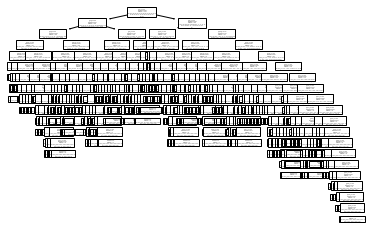

In [21]:
tree.plot_tree(decisionTree)

r = export_text(decisionTree)
print(r)

Validate decision tree using validation data.

In [22]:
# Apply decision "tree on data
predictedValues = decisionTree.predict(validation_features)

analyzeModelAndOutput(validation_labels, predictedValues)

# Part 2.C: Best Decision Tree


Import and setup the hyper-parameters.

In [23]:
from sklearn.model_selection import GridSearchCV

model_name='Best-DT'

# Setup hyper-parameters:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [10, None],
    'min_samples_split': [2,4,8],
    'min_impurity_decrease': [0,1,2,4,5,10],
    'class_weight': [None,'balanced']
}

GridSearchCV helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [24]:
decisionTree = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv=cv)
decisionTree.fit(combined_features, combined_labels)

print('Best parameters set:')
print(decisionTree.best_params_)

Best parameters set:
{'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 2}


Testing.

In [25]:
predictedValues = decisionTree.predict(testing_features)
analyzeModelAndOutput(testing_labels, predictedValues)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part 2.D: Perceptron
Perceptron is a classification algorithm which shares the same underlying implementation with SGDClassifier. In fact, Perceptron() is equivalent to SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).

Import and setup perceptron.

In [26]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

model_name='PER'

# Setup perceptron
perceptron = Perceptron()

Training and testing.

In [27]:
# Train
perceptron = perceptron.fit(training_features, training_labels)

# Test
predictedValues = perceptron.predict(testing_features)
analyzeModelAndOutput(testing_labels, predictedValues)

# Part 2.E: Base-MLP: (Multi-Layered Perceptron)
a baseline Multi-Layered Perceptron with 1 hidden layer of100 neurons, sigmoid/logistic
as activation function, stochastic gradient descent, and default values for the rest of the parameters.

Import and setup multi-layered perceptron.

In [28]:
from sklearn.neural_network import MLPClassifier

model_name='Base-MLP'

# Setup multi-layered perceptron
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd')

Training and testing.

In [29]:
# Train
mlp = mlp.fit(training_features, training_labels)

# Test
predictedValues = mlp.predict(testing_features)
analyzeModelAndOutput(testing_labels, predictedValues)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part 2.F: Best-MLP: (Multi-Layered Perceptron)
a better performing Multi-Layered Perceptron found by performing grid search to find the
best combination of hyper-parameters.

Setup of hyper-parameters.

In [30]:
model_name='Best-MLP'

param_grid = [{'activation': ['identity', 'logistic', 'tanh', 'relu'],
               'solver': ['sgd', 'adam'],
               'hidden_layer_sizes': [(100,), (30,50), (10,10,10)]}]

Training.

In [31]:
bmlp = GridSearchCV(MLPClassifier(), param_grid = param_grid, cv=cv)
bmlp.fit(combined_features, combined_labels)

print('Best parameters set:')
print(bmlp.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

Best parameters set:
{'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing.

In [32]:
predictedValues = bmlp.predict(testing_features)
analyzeModelAndOutput(testing_labels, predictedValues)

# Part 3: Function that outputs the results of the models to csv files

In [14]:
import csv
import pandas as pd

def analyzeModelAndOutput(actual_values, predicted_values, newline=' '):
    with open(model_name + "-DS" + dataset + ".csv", mode='w') as output_file:
        writer = csv.writer(output_file)
        for i in predicted_values:
            writer.writerow([str(i+1),str(predicted_values[i])])
        # get confusion matrix using predicted results and actual results (labels)
        confusionMatrix = confusion_matrix(actual_values, predicted_values)
        writer.writerow(['                                                    '])
        writer.writerow(['====================================================='])
        writer.writerow(['                 Confusion Matrix:'])
        writer.writerow(['====================================================='])
        
    df = pd.DataFrame(confusionMatrix) 
    df.to_csv(model_name + "-DS" + dataset + ".csv", mode='a', header=False)
    
    with open(model_name + "-DS" + dataset + ".csv", mode='a') as output_file:
        writer = csv.writer(output_file)
        # get precision recall fscore support for each class using the predicted results and actual results (labels)
        (precision, recall, fscore, _) = precision_recall_fscore_support(actual_values, predicted_values)
        writer.writerow(['===================================='])
        writer.writerow(['','Precision:'])
    
    df = pd.DataFrame(precision) 
    df.to_csv(model_name + "-DS" + dataset + ".csv", mode='a', header=False)
    
    with open(model_name + "-DS" + dataset + ".csv", mode='a') as output_file:
        writer = csv.writer(output_file)
        writer.writerow(['------------------------------------'])
        writer.writerow(['','Recall:'])
        
    df = pd.DataFrame(recall) 
    df.to_csv(model_name + "-DS" + dataset + ".csv", mode='a', header=False)
    
    with open(model_name + "-DS" + dataset + ".csv", mode='a') as output_file:
        writer = csv.writer(output_file)
        writer.writerow(['------------------------------------'])
        writer.writerow(['','F-Score:'])
        
    df = pd.DataFrame(fscore) 
    df.to_csv(model_name + "-DS" + dataset + ".csv", mode='a', header=False)
    
    with open(model_name + "-DS" + dataset + ".csv", mode='a') as output_file:
        writer = csv.writer(output_file)
        writer.writerow(['===================================='])
        # get accuracy, macro-average f1 and weighted-average f1 of the model using the predicted results and actual results (labels)
        (_, _, macroAverageFScore, _) = precision_recall_fscore_support(actual_values, predicted_values, average='macro')
        (_, _, weightedAverageFScore, _) = precision_recall_fscore_support(actual_values, predicted_values, average='weighted')
        accuracyScore = accuracy_score(actual_values, predicted_values)
        writer.writerow(['','Macro Average F-Score:'])
        writer.writerow(['',macroAverageFScore])
        writer.writerow(['','Weighted Average F-Score:'])
        writer.writerow(['',weightedAverageFScore])
        writer.writerow(['','Accuracy Score:'])
        writer.writerow(['',accuracyScore])
        

    